## Set up

### Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os 
import sys
import glob
import math
import torch
import pickle as pkl
from os.path import join
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm, trange
sys.path.append("/n/home12/binxuwang/Github/Neuro-ActMax-GAN-comparison")
from neuro_data_analysis.neural_data_lib import load_img_resp_pairs, load_neural_data
import mat73


In [3]:
import platform
from core.utils.dataset_utils import ImageDataset_filter
from core.utils.dataset_utils import create_imagenet_valid_dataset

if platform.system() == "Windows":
    stim_rootdir = "S:"
    device = "cuda"
elif platform.system() == "Darwin":
    stim_rootdir = "/Users/binxuwang/Network_mapping"
    device = "mps"
elif platform.system() == "Linux":
    stim_rootdir = "/n/holylabs/LABS/kempner_fellows/Users/binxuwang/Datasets"
    stim_rootdir = "/n/holyscratch01/kempner_fellows/Users/binxuwang/Datasets"
    device = "cuda"

In [4]:
BFEStats_merge, BFEStats = load_neural_data()

In [5]:
tabdir = r"/n/holylabs/LABS/kempner_fellows/Users/binxuwang/Projects/BigGAN_Project/Stats_tables"
meta_df = pd.read_csv(join(tabdir, "meta_activation_stats_w_optimizer.csv"), index_col=0)

### Load latent code trajectory

In [6]:
latent_dir = r"/n/holylabs/LABS/kempner_fellows/Users/binxuwang/Projects/BigGAN_latent_codes"

In [7]:
# loading all sessions
mat_col = {}
for Expi in trange(1, 190+1):
    for thread in [1, 2]:
        # check if the file exists
        if not os.path.exists(join(latent_dir, f"Exp{Expi:03d}_thread{thread}_all_codes.mat")):
            print(f"Exp{Expi}_thread{thread}_all_codes.mat does not exist")
            continue
        matdata = mat73.loadmat(join(latent_dir, f"Exp{Expi:03d}_thread{thread}_all_codes.mat"))
        mat_col[(Expi, thread)] = matdata 

  0%|                                                                                                                      | 0/190 [00:00<?, ?it/s]

  1%|▌                                                                                                             | 1/190 [00:00<00:45,  4.18it/s]

Exp1_thread2_all_codes.mat does not exist


  1%|█▏                                                                                                            | 2/190 [00:00<01:33,  2.02it/s]

Exp2_thread2_all_codes.mat does not exist


  6%|██████▎                                                                                                      | 11/190 [00:06<01:20,  2.21it/s]

Exp11_thread2_all_codes.mat does not exist


 31%|█████████████████████████████████▎                                                                           | 58/190 [00:29<00:51,  2.55it/s]

Exp58_thread2_all_codes.mat does not exist


 32%|██████████████████████████████████▍                                                                          | 60/190 [00:29<00:42,  3.06it/s]

Exp59_thread2_all_codes.mat does not exist
Exp60_thread2_all_codes.mat does not exist


 33%|███████████████████████████████████▌                                                                         | 62/190 [00:30<00:32,  3.89it/s]

Exp61_thread2_all_codes.mat does not exist
Exp62_thread2_all_codes.mat does not exist


 43%|██████████████████████████████████████████████▍                                                              | 81/190 [00:43<01:20,  1.36it/s]

Exp81_thread2_all_codes.mat does not exist


 43%|███████████████████████████████████████████████                                                              | 82/190 [00:44<01:02,  1.73it/s]

Exp82_thread2_all_codes.mat does not exist
Exp83_thread2_all_codes.mat does not exist


 44%|████████████████████████████████████████████████▏                                                            | 84/190 [00:44<00:41,  2.56it/s]

Exp84_thread2_all_codes.mat does not exist


 45%|█████████████████████████████████████████████████▎                                                           | 86/190 [00:45<00:34,  3.00it/s]

Exp85_thread2_all_codes.mat does not exist
Exp86_thread2_all_codes.mat does not exist


 51%|███████████████████████████████████████████████████████▋                                                     | 97/190 [00:51<00:52,  1.77it/s]

Exp97_thread2_all_codes.mat does not exist


 57%|█████████████████████████████████████████████████████████████▍                                              | 108/190 [00:57<00:42,  1.93it/s]

Exp108_thread2_all_codes.mat does not exist


 83%|█████████████████████████████████████████████████████████████████████████████████████████▊                  | 158/190 [01:20<00:14,  2.19it/s]

Exp158_thread2_all_codes.mat does not exist


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 181/190 [01:33<00:04,  2.05it/s]

Exp182_thread1_all_codes.mat does not exist
Exp182_thread2_all_codes.mat does not exist
Exp183_thread1_all_codes.mat does not exist
Exp183_thread2_all_codes.mat does not exist


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 190/190 [01:37<00:00,  1.95it/s]


In [ ]:
sorted(os.listdir(latent_dir))

['Exp001_thread1_all_codes.mat',
 'Exp002_thread1_all_codes.mat',
 'Exp003_thread1_all_codes.mat',
 'Exp003_thread2_all_codes.mat',
 'Exp004_thread1_all_codes.mat',
 'Exp004_thread2_all_codes.mat',
 'Exp005_thread1_all_codes.mat',
 'Exp005_thread2_all_codes.mat',
 'Exp006_thread1_all_codes.mat',
 'Exp006_thread2_all_codes.mat',
 'Exp007_thread1_all_codes.mat',
 'Exp007_thread2_all_codes.mat',
 'Exp008_thread1_all_codes.mat',
 'Exp008_thread2_all_codes.mat',
 'Exp009_thread1_all_codes.mat',
 'Exp009_thread2_all_codes.mat',
 'Exp010_thread1_all_codes.mat',
 'Exp010_thread2_all_codes.mat',
 'Exp011_thread1_all_codes.mat',
 'Exp012_thread1_all_codes.mat',
 'Exp012_thread2_all_codes.mat',
 'Exp013_thread1_all_codes.mat',
 'Exp013_thread2_all_codes.mat',
 'Exp014_thread1_all_codes.mat',
 'Exp014_thread2_all_codes.mat',
 'Exp015_thread1_all_codes.mat',
 'Exp015_thread2_all_codes.mat',
 'Exp016_thread1_all_codes.mat',
 'Exp016_thread2_all_codes.mat',
 'Exp017_thread1_all_codes.mat',
 'Exp017_t

In [ ]:
# loading example session
matdata = mat73.loadmat(join(latent_dir, 'Exp188_thread2_all_codes.mat')) # sio loadmat won't work.

## Load in BigGAN and inspect the class embeddings

In [8]:
import torch
# from torchvision.models import BigGAN
from pytorch_pretrained_biggan import BigGAN, one_hot_from_names, truncated_noise_sample
# Load the pretrained BigGAN model
model = BigGAN.from_pretrained('biggan-deep-256')

In [9]:
# Get the class embeddings
class_embeddings = model.embeddings.weight.data
print(class_embeddings)
print(class_embeddings.shape) # 128 x 1000

tensor([[-0.0143, -0.0623, -0.0033,  ...,  0.0417, -0.0621, -0.0445],
        [-0.0389,  0.1192, -0.0805,  ...,  0.0070,  0.0922,  0.0580],
        [ 0.0208,  0.1063,  0.0381,  ..., -0.0335, -0.0023, -0.0177],
        ...,
        [-0.0137, -0.0010, -0.1294,  ..., -0.0101, -0.0350,  0.0231],
        [ 0.0710,  0.0979, -0.0355,  ...,  0.0431, -0.0041, -0.1132],
        [-0.0708, -0.0105,  0.0520,  ..., -0.0414,  0.0579,  0.0404]])
torch.Size([128, 1000])


### Load in ImageNet class names
 * inspired by this function https://github.com/huggingface/pytorch-pretrained-BigGAN/blob/1e18aed2dff75db51428f13b940c38b923eb4a3d/pytorch_pretrained_biggan/utils.py#L174 

In [10]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /n/home12/binxuwang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
from nltk.corpus import wordnet as wn
# Example synset ID
synset_id = '1443537.n.01'
synsets = wn.synset_from_pos_and_offset('n',4543158)
# Get word descriptions for the synset ID
# synsets = wn.synset(synset_id)
print(synsets) # synsets.name()
# word_descriptions = synsets.definition()
print("Definition:", synsets.definition())
print("Examples:", synsets.examples())

Synset('wagon.n.01')
Definition: any of various kinds of wheeled vehicles drawn by an animal or a tractor
Examples: []


In [12]:
# print the ImageNet class and it's wordnet description
from pytorch_pretrained_biggan.utils import IMAGENET
for offset, class_id in IMAGENET.items():
    # print(offset, class_id)
    synsets = wn.synset_from_pos_and_offset('n',offset)
    # Get word descriptions for the synset ID
    print(f"ImageNet class ID {class_id}")
    print(synsets) # synsets.name()
    print("Definition:", synsets.definition())
    # print("Examples:", synsets.examples())
    # if class_id > 10: break

ImageNet class ID 0
Synset('tench.n.01')
Definition: freshwater dace-like game fish of Europe and western Asia noted for ability to survive outside water
ImageNet class ID 1
Synset('goldfish.n.01')
Definition: small golden or orange-red freshwater fishes of Eurasia used as pond or aquarium fishes
ImageNet class ID 2
Synset('great_white_shark.n.01')
Definition: large aggressive shark widespread in warm seas; known to attack humans
ImageNet class ID 3
Synset('tiger_shark.n.01')
Definition: large dangerous warm-water shark with striped or spotted body
ImageNet class ID 4
Synset('hammerhead.n.03')
Definition: medium-sized live-bearing shark with eyes at either end of a flattened hammer-shaped head; worldwide in warm waters; can be dangerous
ImageNet class ID 5
Synset('electric_ray.n.01')
Definition: any sluggish bottom-dwelling ray of the order Torpediniformes having a rounded body and electric organs on each side of the head capable of emitting strong electric discharges
ImageNet class ID

In [87]:
label_dict = {}
for offset, class_id in IMAGENET.items():
    # print(offset, class_id)
    synsets = wn.synset_from_pos_and_offset('n',offset)
    synset_name = synsets.name()
    imagenet_name = synset_name.split(".")[0]
    label_dict[class_id] = imagenet_name

### Compute neightboring structure to class center

In [13]:
list(meta_df)

['Animal',
 'expdate',
 'ephysFN',
 'prefchan',
 'prefunit',
 'visual_area',
 'space1',
 'space2',
 'optim_names1',
 'optim_names2',
 'blockN',
 't_endinit_0',
 'p_endinit_0',
 't_endinit_1',
 'p_endinit_1',
 't_maxinit_0',
 'p_maxinit_0',
 't_maxinit_1',
 'p_maxinit_1',
 't_maxend_0',
 'p_maxend_0',
 't_maxend_1',
 'p_maxend_1',
 't_FCBG_end_01',
 'p_FCBG_end_01',
 't_FCBG_max_01',
 'p_FCBG_max_01',
 'maxrsp_0_mean',
 'maxrsp_0_std',
 'maxrsp_0_sem',
 'maxrsp_1_mean',
 'maxrsp_1_std',
 'maxrsp_1_sem',
 'endrsp_0_mean',
 'endrsp_0_std',
 'endrsp_0_sem',
 'endrsp_1_mean',
 'endrsp_1_std',
 'endrsp_1_sem',
 'initrsp_0_mean',
 'initrsp_0_std',
 'initrsp_0_sem',
 'initrsp_1_mean',
 'initrsp_1_std',
 'initrsp_1_sem',
 'space_names1',
 'space_names2',
 'optim_names1_y',
 'optim_names2_y']

In [20]:
for Expi, row in meta_df.iterrows():
    print(row.space1, row.space2)
    print(row.optim_names1, row.optim_names2)
    if "BigGAN" in row.space2:
        print(list(mat_col[(Expi, 2)]))
        codes_arr = mat_col[(Expi, 2)]["codes_all"]
        genvec = mat_col[(Expi, 2)]["code_geni"]
        print(codes_arr.shape, genvec.shape)
        # mat_col[(Expi, 2)]["generations"]
    break

fc6 BigGAN_class
CMAES CMAES
['code_geni', 'codes_all', 'img_ids']
(1175, 128) (1175,)


In [18]:
mat_col[row.Expi, 2]

AttributeError: 'Series' object has no attribute 'Expi'

## Mass computation

In [29]:
from embed_analysis.distance_lib import compute_eigen, dist2k_nearest_neighbor_cosine_w_index, \
    dist2k_nearest_neighbor_mahalanobis_w_index, dist2k_nearest_neighbor_w_index, mahalanobis_sqdist

In [24]:
dataset_str = "BigGAN_embed"
BigGAN_embed = BigGAN.from_pretrained('biggan-deep-256').embeddings.weight.data.T
data_mean, data_eigvals, data_eigvecs = compute_eigen(BigGAN_embed)

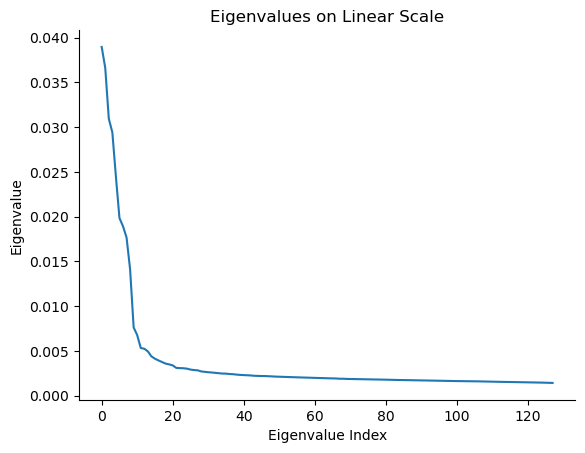

In [28]:
plt.plot(data_eigvals.cpu())
plt.xlabel('Eigenvalue Index')
plt.ylabel('Eigenvalue')
# plt.yscale('log')
plt.title('Eigenvalues on Linear Scale')
plt.show()


In [30]:
BigGAN.generator

AttributeError: type object 'BigGAN' has no attribute 'generator'

In [31]:
meta_df.space2.unique()

array(['BigGAN_class', 'BigGAN'], dtype=object)

In [ ]:
meta_df.space2.unique()

In [34]:
embeddings.dtype

torch.float64

In [40]:
# compute mahalanobis distance for all Exps
dataset_str = "BG_latent"
BigGAN_embed = BigGAN.from_pretrained('biggan-deep-256').embeddings.weight.data.T
device = "cuda"
stats_df_col = []
for Expi in tqdm(range(1, 190+1)):
    if Expi not in meta_df.index:
        continue
    row = meta_df.loc[Expi]
    meta_dict = row[['Animal', 'expdate', 'ephysFN', 'prefchan', 'prefunit', 'visual_area',
       'space1', 'space2', 'optim_names1', 'optim_names2', 'blockN']].to_dict()
    # Evol_data = pkl.load(open(join(Evol_embed_dir, f"Exp{Expi:03d}_embed_act_data.pkl"), "rb"))
    for thread in [0, 1]:
        if not ("BigGAN" in row[f"space{thread+1}"]):
            continue
        stats_col = {}
        codes_arr = mat_col[(Expi, thread+1)]["codes_all"]
        gen_vec = mat_col[(Expi, thread+1)]["code_geni"]
        if row[f"space{thread+1}"] == "BigGAN":
            embeddings = codes_arr[:, 128:] # noise + class, only class is used
        elif row[f"space{thread+1}"] == "BigGAN_class":
            embeddings = codes_arr
        else:
            raise NotImplementedError
        embeddings = torch.from_numpy(embeddings).float().to(device)
        # TODO: align the codes with the response thru image names
        # resp_mat = Evol_data[f"resp_mat{thread}"]
        stats_col["Expi"] = Expi
        stats_col["thread"] = thread
        stats_col["generation"] = gen_vec
        stats_col["spacename"] = row[f"space{thread+1}"]
        stats_col["optim_name"] = row[f"optim_names{thread+1}"]
        # stats_col["resp_mean"] = resp_mat[:, 0]
        # data_mean, data_eigvals, data_eigvecs = MH_eig_col[dataset_str]a
        MHdist_thread = mahalanobis_sqdist(embeddings, data_mean, 
                                           data_eigvecs, data_eigvals, eigfloor=1e-3).cpu()
        # NLL_thread = gaussian_nll_with_eig(embeddings, data_mean, data_eigvals, data_eigvecs, eigfloor=1e-3).cpu()
        kNNdist, kNN_idxs = dist2k_nearest_neighbor_w_index(embeddings, BigGAN_embed, k_list=[1, 5, 10, 25, 50])
        KNNMHdist, KNNMH_idxs = dist2k_nearest_neighbor_mahalanobis_w_index(embeddings, BigGAN_embed, [1, 5, 10, 25, 50],
                                                        data_eigvecs, data_eigvals, eigfloor=1e-3)
        kNNcosdist, kNNcos_idxs = dist2k_nearest_neighbor_cosine_w_index(embeddings, BigGAN_embed, [1, 5, 10, 25, 50])
        stats_col[f"MHdist_{dataset_str}"] = MHdist_thread
        # stats_col[f"NLL_{dataset_str}"] = NLL_thread
        for k in kNNdist:
            stats_col[f"kNNdist_{k}_{dataset_str}"] = kNNdist[k].cpu()
            stats_col[f"kNNMHdist_{k}_{dataset_str}"] = KNNMHdist[k].cpu()
            stats_col[f"kNNcosdist_{k}_{dataset_str}"] = kNNcosdist[k].cpu()
        for i in range(50):
            stats_col[f"kNNidx_{i}_{dataset_str}"] = kNN_idxs[:, i].cpu()
            stats_col[f"kNNMHidx_{i}_{dataset_str}"] = KNNMH_idxs[:, i].cpu()
            stats_col[f"kNNcosidx_{i}_{dataset_str}"] = kNNcos_idxs[:, i].cpu()
        stats_col.update(meta_dict)
        stats_df = pd.DataFrame(stats_col)
        stats_df_col.append(stats_df)

stats_df_all = pd.concat(stats_df_col, ignore_index=True)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 190/190 [00:01<00:00, 118.17it/s]


In [41]:
stats_df_all.to_csv(join(tabdir, "Evol_BigGAN_latent_kNN_indices.csv"))

In [39]:
stats_df_all.shape

(132933, 182)

## Post hoc kNN analysis

In [42]:
stats_df_all = pd.read_csv(join(tabdir, "Evol_BigGAN_latent_kNN_indices.csv"), index_col=0)

In [43]:
from neuro_data_analysis.neural_data_utils import get_all_masks
Amsk, Bmsk, V1msk, V4msk, ITmsk, length_msk, spc_msk, \
    sucsmsk, bsl_unstable_msk, bsl_stable_msk, validmsk = get_all_masks(meta_df)
mask_dict = get_all_masks(meta_df, return_type=dict)
FCsucs_msk = meta_df.p_maxinit_0 < 0.05 
BGsucs_msk = meta_df.p_maxinit_1 < 0.05
bothsucs_msk = FCsucs_msk & BGsucs_msk
anysucs_msk = FCsucs_msk | BGsucs_msk
# get global flattened df masks instead of the smaller factorized meta_df masks
validexp_mask = stats_df_all.Expi.isin(meta_df[validmsk].index)
init_gen_mask  = (stats_df_all.generation > 1) & \
                 (stats_df_all.generation <= 5)
final_gen_mask = (stats_df_all.generation >= stats_df_all.blockN - 5) & \
                 (stats_df_all.generation <= stats_df_all.blockN - 1)
BigGAN_mask = stats_df_all.thread == 1
DeePSim_mask = stats_df_all.thread == 0
IT_mask = stats_df_all.visual_area == "IT"
V4_mask = stats_df_all.visual_area == "V4"
V1_mask = stats_df_all.visual_area == "V1"
BGsuccess_mask = stats_df_all.Expi.isin(meta_df[BGsucs_msk].index)
FCsuccess_mask = stats_df_all.Expi.isin(meta_df[FCsucs_msk].index)
bothsuccess_mask = stats_df_all.Expi.isin(meta_df[bothsucs_msk].index)
anysuccess_mask = stats_df_all.Expi.isin(meta_df[anysucs_msk].index)

### kNN Class Identity Analysis

In [51]:
from embed_analysis.kNN_analysis_lib import get_label_dist_in_mask, get_label_dist_in_multimasks

In [67]:
masks = [init_gen_mask & BigGAN_mask & IT_mask & BGsuccess_mask & validexp_mask,
        init_gen_mask & BigGAN_mask & IT_mask & ~BGsuccess_mask & validexp_mask,
        init_gen_mask & BigGAN_mask & V4_mask & BGsuccess_mask & validexp_mask,
        init_gen_mask & BigGAN_mask & V4_mask & ~BGsuccess_mask & validexp_mask,
        final_gen_mask & BigGAN_mask & IT_mask & BGsuccess_mask & validexp_mask,
        final_gen_mask & BigGAN_mask & IT_mask & ~BGsuccess_mask & validexp_mask,
        final_gen_mask & BigGAN_mask & V4_mask & BGsuccess_mask & validexp_mask,
        final_gen_mask & BigGAN_mask & V4_mask & ~BGsuccess_mask & validexp_mask,]
label_strs = [
    "init_gen_BigGAN_IT_BGsuccess",
    "init_gen_BigGAN_IT_BGfail",
    "init_gen_BigGAN_V4_BGsuccess",
    "init_gen_BigGAN_V4_BGfail",
    "final_gen_BigGAN_IT_BGsuccess",
    "final_gen_BigGAN_IT_BGfail",
    "final_gen_BigGAN_V4_BGsuccess",
    "final_gen_BigGAN_V4_BGfail",
]
_, _, cnt_vecs_cos, freq_vecs_cos = get_label_dist_in_multimasks(stats_df_all, masks, label_strs, 
                                dataset_str="BG_latent", stat_str="kNNcosidx", maxk=50)
_, _, cnt_vecs_MH, freq_vecs_MH = get_label_dist_in_multimasks(stats_df_all, masks, label_strs, 
                                dataset_str="BG_latent", stat_str="kNNMHidx", maxk=50)
_, _, cnt_vecs_L2, freq_vecs_L2 = get_label_dist_in_multimasks(stats_df_all, masks, label_strs, 
                                dataset_str="BG_latent", stat_str="kNNidx", maxk=50)

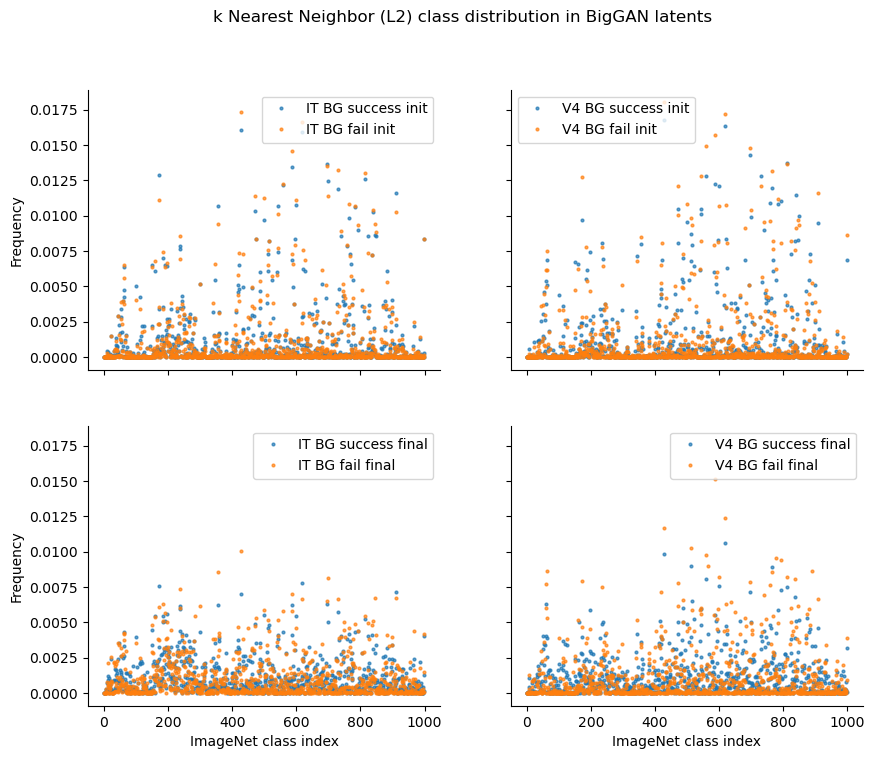

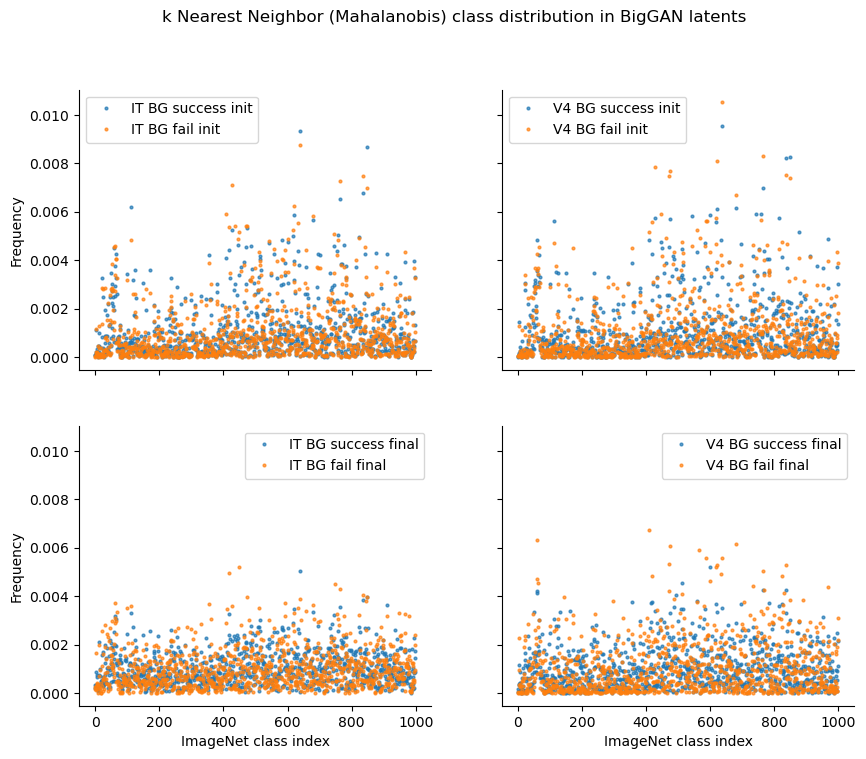

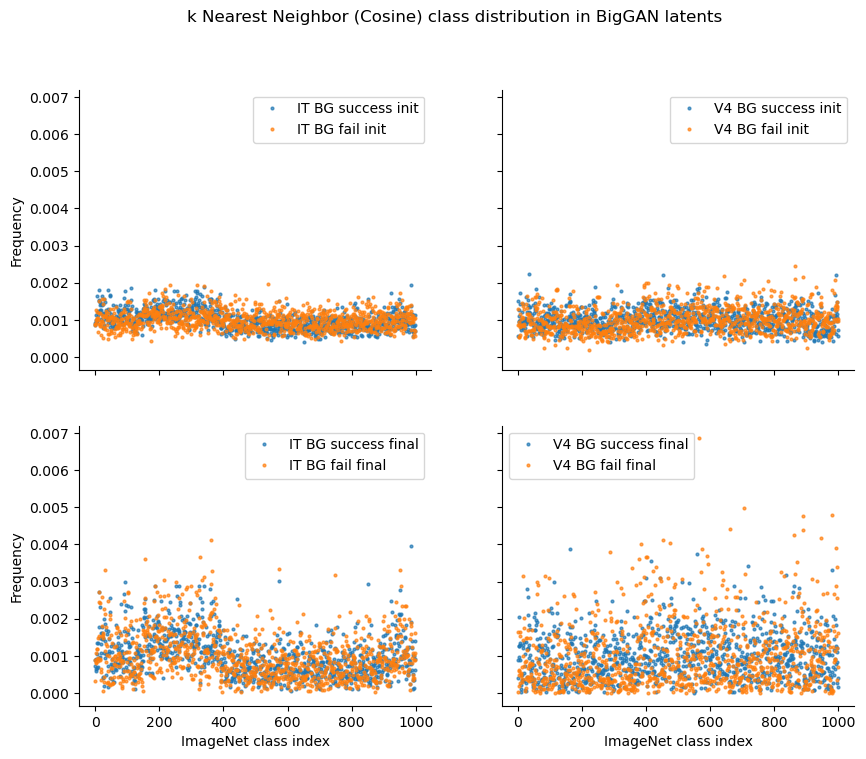

In [72]:
def plot_class_distrib(freq_vecs, titlestr="Cosine"):
    figh, axs = plt.subplots(2,2,figsize=[10, 8],sharex=True, sharey=True)
    plt.sca(axs[0,0])
    plt.plot(freq_vecs["init_gen_BigGAN_IT_BGsuccess"], "o",markersize=2,
            label="IT BG success init", alpha=0.7)
    plt.plot(freq_vecs["init_gen_BigGAN_IT_BGfail"], "o",markersize=2,
            label="IT BG fail init", alpha=0.7)
    plt.legend()
    plt.ylabel("Frequency")
    plt.sca(axs[1,0])
    plt.plot(freq_vecs["final_gen_BigGAN_IT_BGsuccess"], "o",markersize=2,
            label="IT BG success final", alpha=0.7)
    plt.plot(freq_vecs["final_gen_BigGAN_IT_BGfail"], "o",markersize=2,
            label="IT BG fail final", alpha=0.7)
    plt.legend()
    plt.xlabel("ImageNet class index")
    plt.ylabel("Frequency")
    plt.sca(axs[0,1])
    plt.plot(freq_vecs["init_gen_BigGAN_V4_BGsuccess"], "o", markersize=2,
            label="V4 BG success init", alpha=0.7)
    plt.plot(freq_vecs["init_gen_BigGAN_V4_BGfail"], "o",markersize=2,
            label="V4 BG fail init", alpha=0.7)
    plt.legend()
    plt.sca(axs[1,1])
    plt.plot(freq_vecs["final_gen_BigGAN_V4_BGsuccess"], "o", markersize=2,
            label="V4 BG success final", alpha=0.7)
    plt.plot(freq_vecs["final_gen_BigGAN_V4_BGfail"], "o", markersize=2,
            label="V4 BG fail final", alpha=0.7)
    plt.legend()
    plt.xlabel("ImageNet class index")
    plt.suptitle(f"k Nearest Neighbor ({titlestr}) class distribution in BigGAN latents")
    plt.show()
    return figh, axs

figh, axs = plot_class_distrib(freq_vecs_L2, titlestr="L2")
fighs, axss = plot_class_distrib(freq_vecs_MH, titlestr="Mahalanobis")
figh, axs = plot_class_distrib(freq_vecs_cos, titlestr="Cosine")

### Test Visualize relative increase in frequency

In [74]:
from embed_analysis.kNN_analysis_lib import test_print_per_class_difference

In [79]:
label_dict = {}
for offset, class_id in IMAGENET.items():
    # print(offset, class_id)
    synsets = wn.synset_from_pos_and_offset('n',offset)
    synset_name = synsets.name()
    imagenet_name = synset_name.split(".")[0]
    label_dict[class_id] = imagenet_name

Chi2 test p-value: 0.0e+00 chi2=43068.92 dof=999


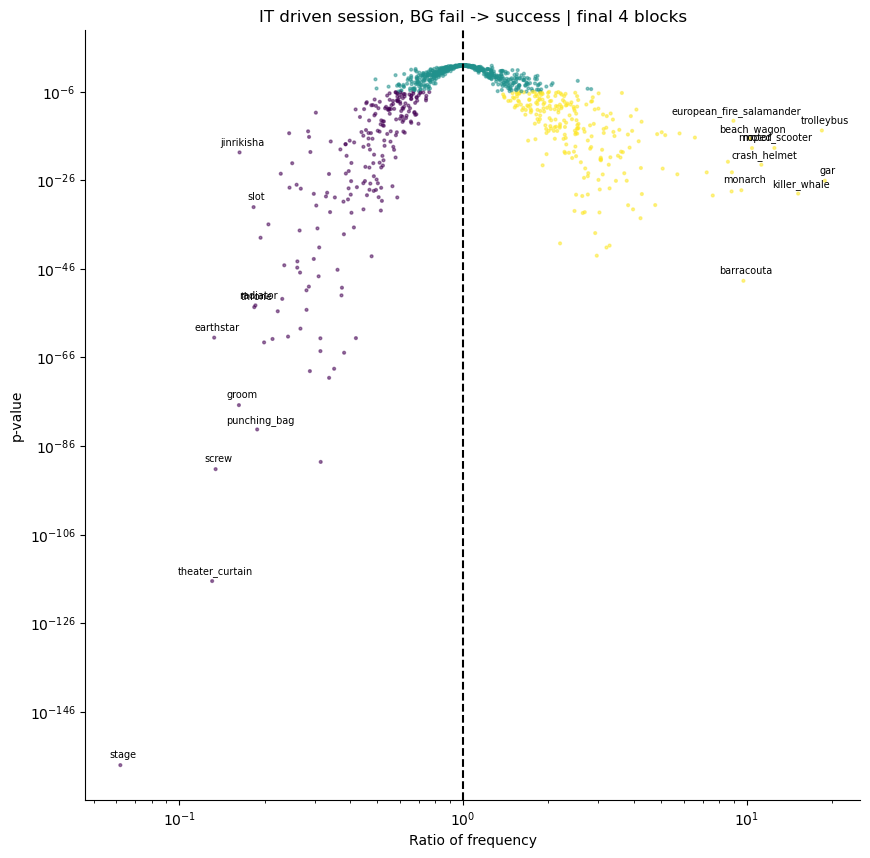

In [82]:
show_k = 10
chi2_df, chi2_all, p_val_all, dof_all = test_print_per_class_difference(
                      cnt_vecs_cos["final_gen_BigGAN_IT_BGfail"], 
                      cnt_vecs_cos["final_gen_BigGAN_IT_BGsuccess"],
                      label_dict=label_dict, )

plt.figure(figsize=[10, 10])
plt.scatter(chi2_df.ratio, chi2_df.p_value, 
            c=(chi2_df.p_value < 1E-6) * (np.sign(np.log(chi2_df.ratio))), 
            s=4, alpha=0.5)
plt.xscale('log')
plt.yscale('log')
# Annotating points
top_points = chi2_df[chi2_df.p_value < 1E-10].sort_values(by='ratio', ascending=False).head(show_k)
bot_points = chi2_df[chi2_df.p_value < 1E-10].sort_values(by='ratio', ascending=True).head(show_k)
for _, row in pd.concat([top_points, bot_points]).iterrows():
    plt.annotate(row['label_name'], 
                 xy=(row['ratio'], row['p_value']),
                xycoords='data', 
                textcoords="offset points", 
                xytext=(2,5),
                fontsize=7,
                 ha='center')

plt.axvline(1, color='k', linestyle='--')
plt.xlabel("Ratio of frequency")
plt.ylabel("p-value")
plt.title("IT driven session, BG fail -> success | final 4 blocks")
plt.show()

Chi2 test p-value: 0.0e+00 chi2=99958.52 dof=999


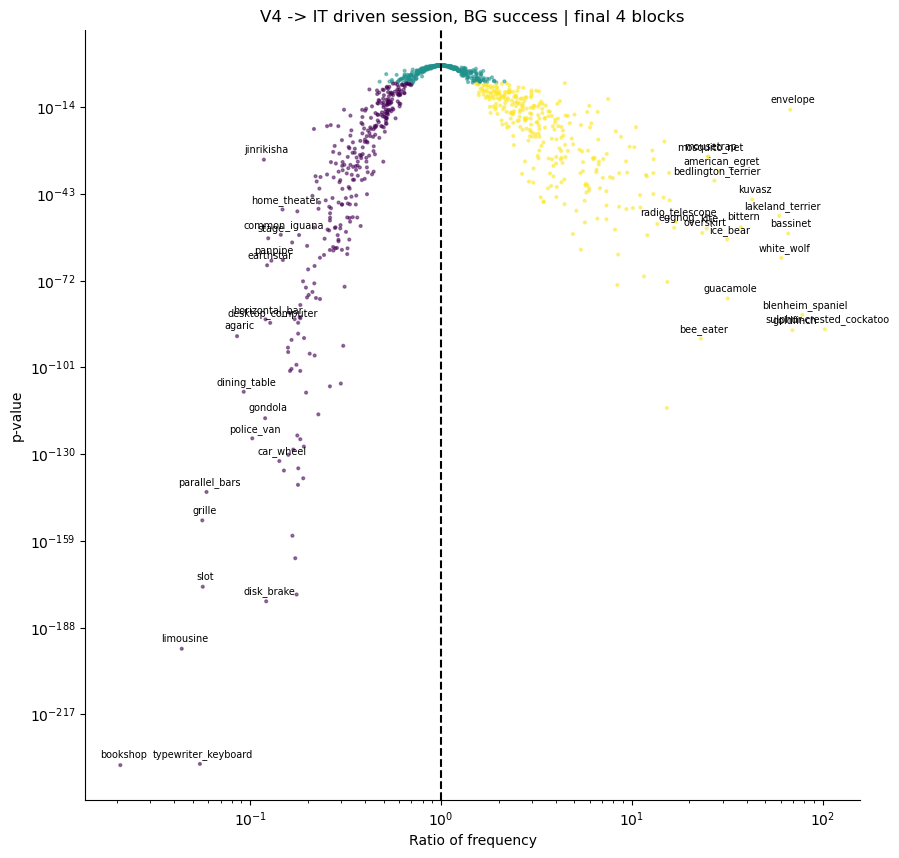

In [86]:
show_k = 20
chi2_df, chi2_all, p_val_all, dof_all = test_print_per_class_difference(
                      cnt_vecs_cos["final_gen_BigGAN_V4_BGsuccess"], 
                      cnt_vecs_cos["final_gen_BigGAN_IT_BGsuccess"],
                      label_dict=label_dict, )

plt.figure(figsize=[10, 10])
plt.scatter(chi2_df.ratio, chi2_df.p_value, 
            c=(chi2_df.p_value < 1E-6) * (np.sign(np.log(chi2_df.ratio))), 
            s=4, alpha=0.5)
plt.xscale('log')
plt.yscale('log')
# Annotating points
top_points = chi2_df[chi2_df.p_value < 1E-10].sort_values(by='ratio', ascending=False).head(show_k)
bot_points = chi2_df[chi2_df.p_value < 1E-10].sort_values(by='ratio', ascending=True).head(show_k)
for _, row in pd.concat([top_points, bot_points]).iterrows():
    plt.annotate(row['label_name'], 
                 xy=(row['ratio'], row['p_value']),
                 xycoords='data', 
                 textcoords="offset points", 
                 xytext=(2,5),
                 fontsize=7,
                 ha='center')

plt.axvline(1, color='k', linestyle='--')
plt.xlabel("Ratio of frequency")
plt.ylabel("p-value")
plt.title("V4 -> IT driven session, BG success | final 4 blocks")
plt.show()

Chi2 test p-value: 0.0e+00 chi2=35723.52 dof=999


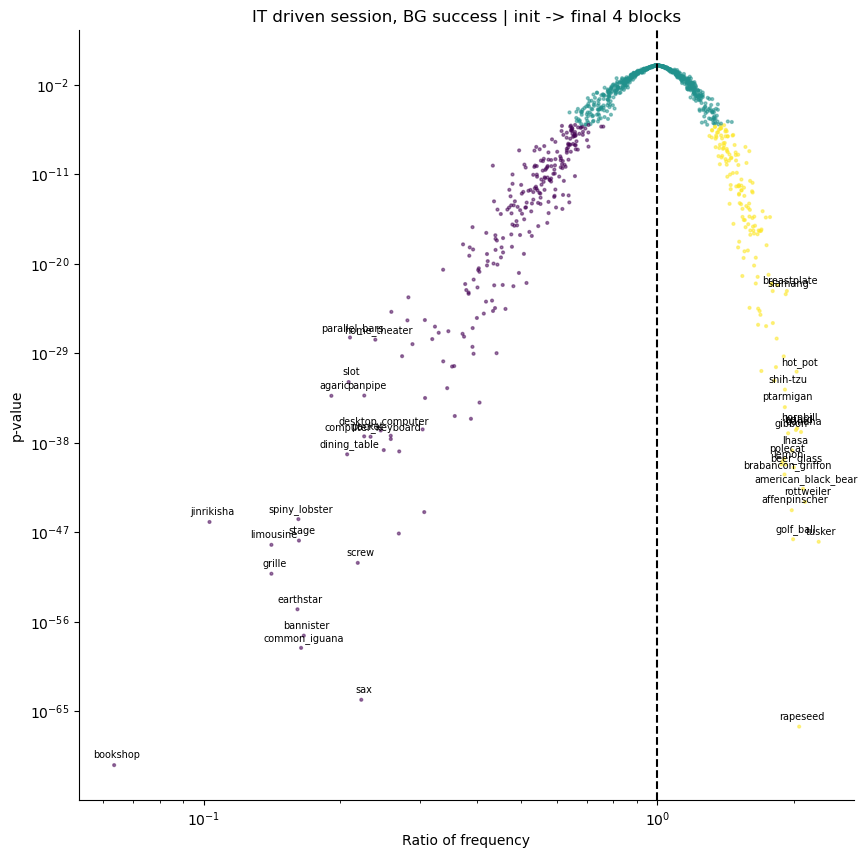

In [85]:
show_k = 20
chi2_df, chi2_all, p_val_all, dof_all = test_print_per_class_difference(
                      cnt_vecs_cos["init_gen_BigGAN_IT_BGsuccess"], 
                      cnt_vecs_cos["final_gen_BigGAN_IT_BGsuccess"],
                      label_dict=label_dict, )

plt.figure(figsize=[10, 10])
plt.scatter(chi2_df.ratio, chi2_df.p_value, 
            c=(chi2_df.p_value < 1E-6) * (np.sign(np.log(chi2_df.ratio))), 
            s=4, alpha=0.5)
plt.xscale('log')
plt.yscale('log')
# Annotating points
top_points = chi2_df[chi2_df.p_value < 1E-10].sort_values(by='ratio', ascending=False).head(show_k)
bot_points = chi2_df[chi2_df.p_value < 1E-10].sort_values(by='ratio', ascending=True).head(show_k)
for _, row in pd.concat([top_points, bot_points]).iterrows():
    plt.annotate(row['label_name'], 
                 xy=(row['ratio'], row['p_value']),
                xycoords='data', 
                textcoords="offset points", 
                xytext=(2,5),
                fontsize=7,
                 ha='center')

plt.axvline(1, color='k', linestyle='--')
plt.xlabel("Ratio of frequency")
plt.ylabel("p-value")
plt.title("IT driven session, BG success | init -> final 4 blocks")
plt.show()

In [ ]:
print("Most significant increased labels in IT driven session, BG fail -> success | final 4 blocks")
chi2_df[chi2_df.ratio > 1].sort_values(by="p_value").head(25)

In [ ]:
print("Most significant decreased labels in IT driven session, BG fail -> success | final 4 blocks")
chi2_df[chi2_df.ratio < 1].sort_values(by="p_value").head(25)

### Distance Trajectory Visualization

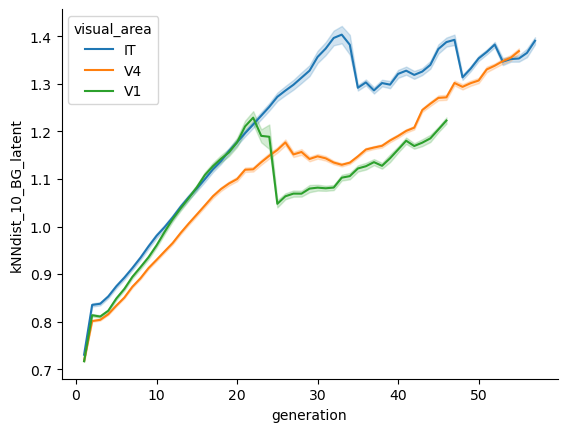

In [44]:
sns.lineplot(data=stats_df_all[validexp_mask],
             x="generation", y="kNNdist_10_BG_latent", hue="visual_area",
             n_boot=0, errorbar="se")
plt.show()


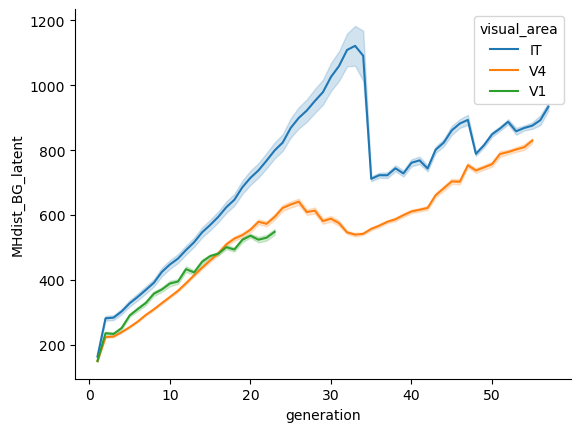

In [49]:
sns.lineplot(data=stats_df_all[validexp_mask & BGsuccess_mask],
             x="generation", y="MHdist_BG_latent", hue="visual_area",
             n_boot=0, errorbar="se")
plt.show()


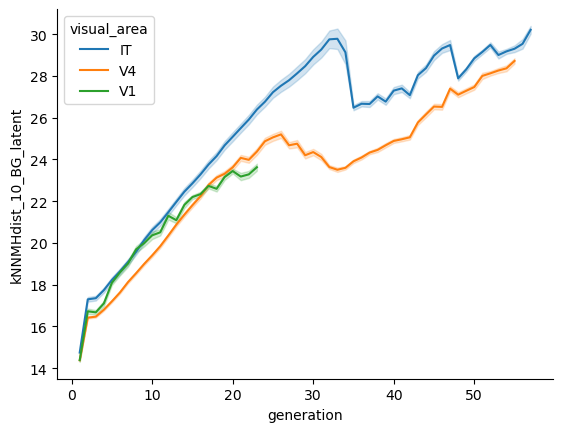

In [50]:
sns.lineplot(data=stats_df_all[validexp_mask & BGsuccess_mask],
             x="generation", y="kNNMHdist_10_BG_latent", hue="visual_area",
             n_boot=0, errorbar="se")
plt.show()


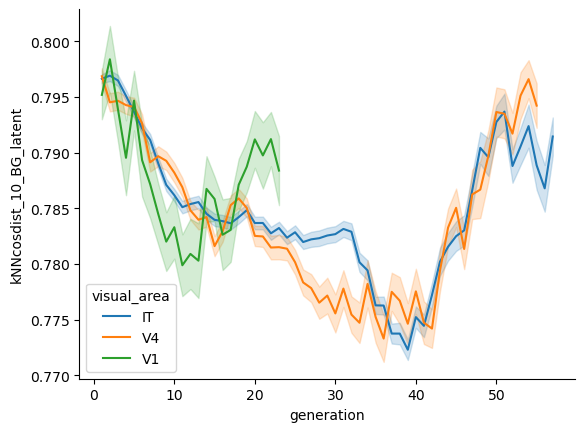

In [48]:
sns.lineplot(data=stats_df_all[validexp_mask & BGsuccess_mask],
             x="generation", y="kNNcosdist_10_BG_latent", hue="visual_area",
             n_boot=0, errorbar="se")
plt.show()


## Scratch zone

### Obsolete zip file

In [42]:
import zipfile
BigGANzippath = "/n/holylabs/LABS/kempner_fellows/Users/binxuwang/Datasets/2020-BigGAN.zip"


In [39]:

subfolder = '2020-BigGAN/2020-07-22-Beto-01/2020-07-22-10-14-22'
with zipfile.ZipFile(BigGANzippath, 'r') as zip_ref:
    matfile_list = [file for file in zip_ref.namelist() if file.startswith(subfolder) and file.endswith(".mat")]

matfile_list

['2020-BigGAN/2020-07-22-Beto-01/2020-07-22-10-14-22/block001_thread000_code.mat',
 '2020-BigGAN/2020-07-22-Beto-01/2020-07-22-10-14-22/block001_thread001_code.mat',
 '2020-BigGAN/2020-07-22-Beto-01/2020-07-22-10-14-22/block002_thread000_code.mat',
 '2020-BigGAN/2020-07-22-Beto-01/2020-07-22-10-14-22/block002_thread001_code.mat',
 '2020-BigGAN/2020-07-22-Beto-01/2020-07-22-10-14-22/block003_thread000_code.mat',
 '2020-BigGAN/2020-07-22-Beto-01/2020-07-22-10-14-22/block003_thread001_code.mat',
 '2020-BigGAN/2020-07-22-Beto-01/2020-07-22-10-14-22/block004_thread000_code.mat',
 '2020-BigGAN/2020-07-22-Beto-01/2020-07-22-10-14-22/block004_thread001_code.mat',
 '2020-BigGAN/2020-07-22-Beto-01/2020-07-22-10-14-22/block005_thread000_code.mat',
 '2020-BigGAN/2020-07-22-Beto-01/2020-07-22-10-14-22/block005_thread001_code.mat',
 '2020-BigGAN/2020-07-22-Beto-01/2020-07-22-10-14-22/block006_thread000_code.mat',
 '2020-BigGAN/2020-07-22-Beto-01/2020-07-22-10-14-22/block006_thread001_code.mat',
 '20

In [50]:
import re
import os
def extract_block_thread_info(mat_file):
    mat_stem = os.path.basename(mat_file)
    try:
        block_info = re.search(r'block(\d+)', mat_stem).group(1)
        thread_info = re.search(r'thread(\d+)', mat_stem).group(1)
        return int(block_info), int(thread_info)
    except:
        return None, None

mat_file = '2020-BigGAN/2020-07-22-Beto-01/2020-07-22-10-14-22/block001_thread000_code.mat'
extract_block_thread_info(mat_file)

(1, 0)

Load and visalize latent codes from Evol experiments

In [51]:
from collections import defaultdict
import scipy.io as sio
from tqdm import tqdm, trange
codes_all = defaultdict(list)
ids_all = defaultdict(list)
for mat_file in tqdm(matfile_list):
    block_num, thread_num = extract_block_thread_info(mat_file)
    if block_num is None:
        print(f"block_num is None for {mat_file} skipping")
        continue
    with zipfile.ZipFile(BigGANzippath, 'r') as zip_ref:
        mat_data = sio.loadmat(zip_ref.open(mat_file,))
        # file = zip_ref.read(mat_file,)
    codes_all[thread_num].append(mat_data["codes"])
    ids_all[thread_num].append(mat_data["ids"])


100%|████████████████████████████████████████████████████████████████████████████████████████| 94/94 [03:50<00:00,  2.46s/it]


In [53]:
codes_all_arr = {k: np.concatenate(v, axis=0) for k, v in codes_all.items()}

In [55]:
codes_all_arr[1].shape

(1175, 128)

In [44]:
mat_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Wed Jul 22 10:15:28 2020',
 '__version__': '1.0',
 '__globals__': [],
 'codes': array([[ 1.3561888 , -0.22885117, -1.75902356, ..., -0.07735655,
         -0.0291179 , -0.0098706 ],
        [-2.40081834, -2.17203694,  1.39184485, ...,  3.24359935,
          1.8750949 , -2.30359511],
        [-1.18122834,  2.64743238, -7.19791808, ...,  2.24066993,
          4.34130697,  0.56031726],
        ...,
        [ 0.28673875, -5.52769559,  0.91347857, ..., -2.64465476,
         -6.87077792,  1.77706625],
        [-4.18615736,  4.34126753,  0.91508532, ..., -8.93928696,
          1.65481157,  5.15078059],
        [-1.24257213,  0.01435603, -6.74039642, ..., -1.559407  ,
          0.4917844 ,  2.24868701]]),
 'ids': array([[array(['block002_thread000_gen_gen001_000060.bmp'], dtype='<U40'),
         array(['block002_thread000_gen_gen001_000061.bmp'], dtype='<U40'),
         array(['block002_thread000_gen_gen001_000062.bmp'], dtype

In [37]:
zip_ref.namelist()

['2020-BigGAN/',
 '2020-BigGAN/2020-07-20-Beto-01/',
 '2020-BigGAN/2020-07-20-Beto-01/01_18.bmp',
 '2020-BigGAN/2020-07-20-Beto-01/02_[06]-n04442312_12093.bmp',
 '2020-BigGAN/2020-07-20-Beto-01/03_n04399382_13671.bmp',
 '2020-BigGAN/2020-07-20-Beto-01/04_n04554684_33065.bmp',
 '2020-BigGAN/2020-07-20-Beto-01/05_n03065424_122513.bmp',
 '2020-BigGAN/2020-07-20-Beto-01/06_Vervet_Monkey_(Chlorocebus_pygerythrus).bmp',
 '2020-BigGAN/2020-07-20-Beto-01/07_P1030854.bmp',
 '2020-BigGAN/2020-07-20-Beto-01/08_whoswho_oldworld1_900x1200.bmp',
 '2020-BigGAN/2020-07-20-Beto-01/09_the-redder-the-face-the-more-likely-a-rhesus-macaque-is-to-mate.bmp',
 '2020-BigGAN/2020-07-20-Beto-01/10_05.bmp',
 '2020-BigGAN/2020-07-20-Beto-01/2020-07-20-12-40-51/',
 '2020-BigGAN/2020-07-20-Beto-01/2020-07-20-12-40-51/block001_thread000_code.mat',
 '2020-BigGAN/2020-07-20-Beto-01/2020-07-20-12-40-51/block001_thread000_gen_gen000_000000.bmp',
 '2020-BigGAN/2020-07-20-Beto-01/2020-07-20-12-40-51/block001_thread000_gen_

In [35]:
len(zip_ref.filelist)

417350

In [23]:
stimpath

'/n/holyscratch01/kempner_fellows/Users/binxuwang/Datasets/Stimuli/2020-BigGAN/2020-07-22-Beto-01/2020-07-22-10-14-22'

In [24]:
import glob

mat_files = glob.glob(stimpath + '/*')
mat_file_names = [file.split('/')[-1] for file in mat_files]

mat_file_names


[]